In [2]:
import numpy as np
import matplotlib.pyplot as plt

# GLOBAL SETTINGS
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


### MP2491C

In [3]:
# REFERENCES
"""
MP2491CGQB-Z.pdf
https://fscdn.rohm.com/jp/products/databook/applinote/ic/power/switching_regulator/boost%20behavior%20with%20bootstrap%20capacitance_an-j.pdf
https://detail-infomation.com/rc-low-pass-filter/
https://www.analog.com/jp/education/landing-pages/003/jp-web-lab/tnj067_limitation_and_reason_of_lead_phase_1.html
"""


'\nMP2491CGQB-Z.pdf\nhttps://fscdn.rohm.com/jp/products/databook/applinote/ic/power/switching_regulator/boost%20behavior%20with%20bootstrap%20capacitance_an-j.pdf\nhttps://detail-infomation.com/rc-low-pass-filter/\nhttps://www.analog.com/jp/education/landing-pages/003/jp-web-lab/tnj067_limitation_and_reason_of_lead_phase_1.html\n'

In [40]:
# VARIABLES
Vin = 24  # V
Vout = 16  # V
fsw = 490 * 10**3  # Hz. Typ.
L1 = 7.4 * 10**(-6)  # H
Cin = 50 * 10**(-6)  # F
Cout = 132 * 10**(-6)  # F
I_load = 3.5  # A
R1 = 68 * 10**3  # Ω
R2 = 9.7 * 10**3  # Ω


#### Iout  under Light Load Operation (PFM)
$$ Iout = \frac{(Vin-Vout) \times Vout}{2 \times L_1 \times Fsw \times Vin} \qquad (1)$$

In [5]:
Iout = (Vin-Vout)*Vout / (2*L1*fsw*Vin) *10**3  # light Load Operation (PFM)
print('Iout:', round(Iout, 2), 'mA')

Iout: 735.43 mA


#### deltaIL
$$
I_{L(max)} = I_{load} + \frac{\Delta I_L}{2} \qquad (5)
$$

In [6]:
deltaIL = 6/17*I_load
print('deltaIL:', round(deltaIL, 2), 'A')

deltaIL: 1.24 A


#### L1 
$$ 
L1 = \frac{Vout \times (Vin - Vout)}{Vin \times \Delta I_{L} \times f_{OSC}} \qquad (4)
$$

L1: 8.81 uH


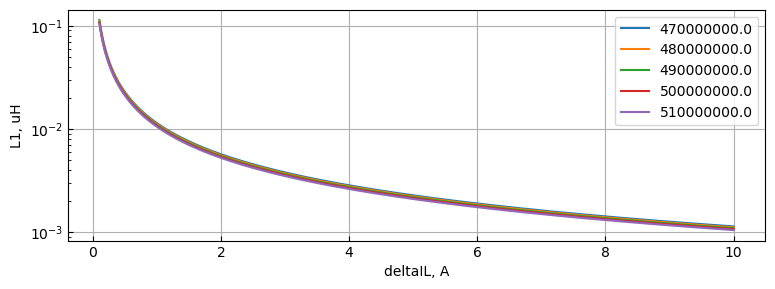

In [7]:
L1 = Vout*(Vin-Vout) / (Vin*deltaIL*fsw)
print('L1:', round(L1*10**(6), 2), 'uH')
# PARAM
deltaIL_tmp = np.linspace(0.1, 10, 500)
fsw_tmp = np.linspace(470*10**6, 510*10**6, 5)
L1_list = []
for i in fsw_tmp:
    L1_tmp = Vout*(Vin-Vout) / (Vin*deltaIL_tmp*i) * 10**6
    L1_list.append(L1_tmp)
# PLOT
plt.figure(figsize=(9, 3))
for i in range(len(L1_list)):
    plt.plot(deltaIL_tmp, L1_list[i], label=fsw_tmp[i])
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('deltaIL, A')
plt.ylabel('L1, uH')
plt.grid()
plt.legend()
plt.show()

#### Icin (RMS)
Since the input capacitor (Cin) absorbs the input switching current, it requires an adequate ripple current rating.
$$
Icin = I\_load \times \sqrt{\frac{Vout}{Vin} \times (1 - \frac{Vout}{Vin})} \qquad(6)
$$

Icin(rms): 1.65 A


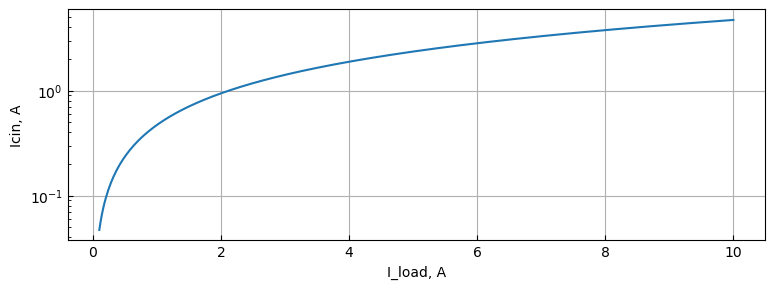

In [8]:
Icin = I_load * np.sqrt((Vout/Vin) * (1 - Vout/Vin))
print('Icin(rms):', round(Icin, 2), 'A')

# PLOT
I_load_tmp = np.linspace(0.1, 10, 500)
Icin_tmp = I_load_tmp * np.sqrt((Vout/Vin) * (1 - Vout/Vin))
plt.figure(figsize=(9, 3))
plt.plot(I_load_tmp, Icin_tmp)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('I_load, A')
plt.ylabel('Icin, A')
plt.grid()
plt.show()

#### deltaVin
The input voltage ripple caused by the capacitance.
$$
\Delta Vin = \frac{I_{load}}{fsw \times Cin} \times \frac{Vout}{Vin} \times (1 - \frac{Vout}{Vin}) \qquad(8)
$$

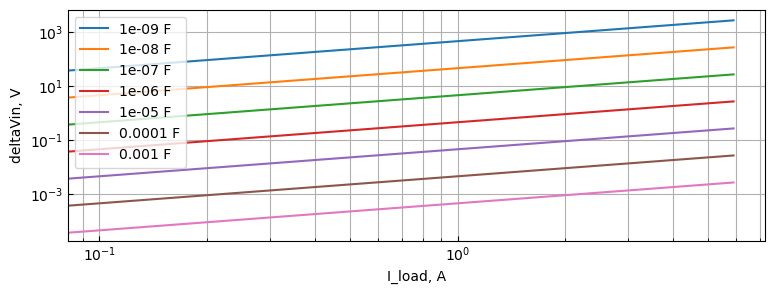

In [24]:
# PARAM
Cin_tmp = np.logspace(-9, -3, 7)
I_load_tmp = np.arange(0, 6, 0.1)
y_list = []
for i in Cin_tmp:
    deltaVin_tmp = I_load_tmp/(fsw*i) * Vout/Vin * (1 - Vout/Vin)
    y_list.append(deltaVin_tmp)
# PLOT
plt.figure(figsize=(9, 3))
for i in range(len(y_list)):
    plt.plot(I_load_tmp, y_list[i], label=str(Cin_tmp[i])+' F')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('I_load, A')
plt.ylabel('deltaVin, V')
plt.grid(which='both')
plt.legend()
plt.show()

#### deltaVout
$$\Delta Vout = \frac{Vout}{fsw \times L1} \times (1 - \frac{Vout}{Vin}) \times (Resr + \frac{1}{8 \times fsw \times Cout}) \qquad(9) $$
For simplification, 
$$ \Delta Vout = \frac{Vout}{8 \times fsw^2 \times L1 \times Cout} \times (1 - \frac{Vout}{Vin}) \qquad (10) $$

deltaVout (simplified) : 0.0 V


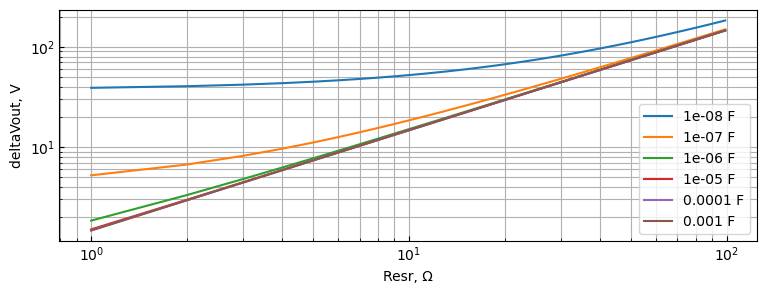

In [45]:
# deltaVout = Vout/(fsw*L1) * (1 - Vout/Vin) * (Resr + 1/(8 * fsw * Cout))  # (9)
# print('deltaVout:', round(deltaVout*10**3, 2), 'mV')
deltaVout = Vout / (8 * fsw**2 * L1 * Cout) * (1 - Vout/Vin)  # (10)
print('deltaVout (simplified) :', round(deltaVout*10**3, 2), 'V')
# PARAM
Cout_tmp = np.logspace(-8, -3, 6)
Resr_tmp = np.arange(1, 100)
y_list = []
for i in Cout_tmp:
    deltaVout_tmp = Vout / (fsw*L1) * (1-Vout/Vin) * (Resr_tmp+1/(8*fsw*i))  # (9)
    y_list.append(deltaVout_tmp)
# PLOT
plt.figure(figsize=(9, 3))
for i in range(len(y_list)):
    plt.plot(Resr_tmp, y_list[i], label=str(Cout_tmp[i])+' F')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Resr, Ω')
plt.ylabel('deltaVout, V')
plt.grid(which='both')
plt.legend()
plt.show()

#### Cff (Feedforward Capacitor)
$$ G(j\omega) = \frac{R_1+j2\pi fC_{ff}R_1R_2}{1} \cdotp
                \frac{1}{(R_1+R_2)+j2\pi fC_{ff}R_1R_2} $$
$$ |G(j\omega)| = \frac{\left((R_1+R_2)R_1+(2\pi fC_{ff}R_1R_2)^2\right) + j2\pi fC_{ff}R_1R_2^2}
                 {(R_1+R_2)^2+(2\pi fC_{ff}R_1R_2)^2} $$
$$ theta = arctan\left(\frac{2\pi fC_{ff}R_1R_2}{R_1}\right) +
           arctan\left(\frac{2\pi fC_{ff}R_1R_2}{R_1+R_2}\right) $$
<MEMO>「回路の増幅率𝐺を低下させる（帰還率𝛽を上昇させる）と、𝑓(𝑈1)と𝑓(𝑈2)とが近接することにより、十分に𝑈1 (𝑓)による進み位相が形成されない」

f1: 0.746 MHz
f2: 0.852 MHz


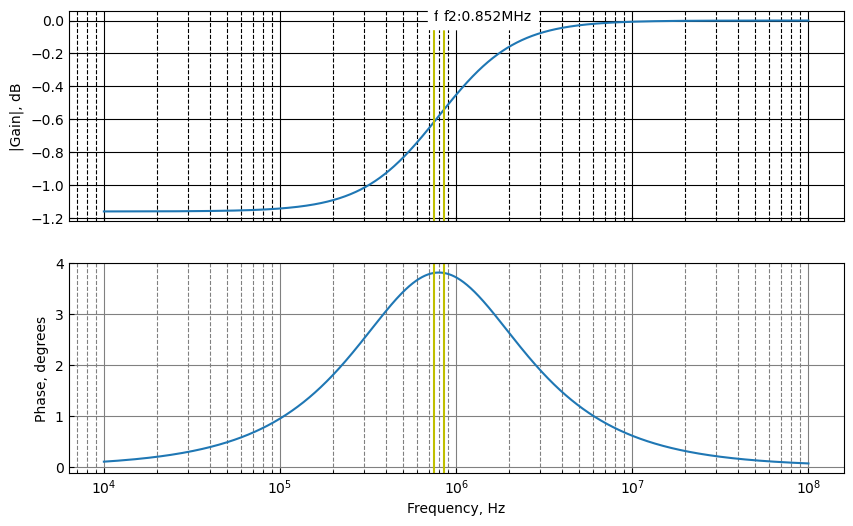

In [11]:
# VARIABLES
R1 = 68*10**3
R2 = 9.7*10**3
Cff = 22 * 10**-12  # F
f1 = 1 / (2 * np.pi * R2 * Cff)  # Hz
f2 = (R1 + R2) / ((2 * np.pi * Cff) * R1*R2)  # Hz
f = np.arange(10**4, 10**8, 1000)  # Hz
# f = np.linspace(10**3, 10**8, 1_000)  # Hz
# f = np.logspace(3, 8, base=10, num=50)  # Hz
print('f1:', round(f1*10**-6, 3), 'MHz')
print('f2:', round(f2*10**-6, 3), 'MHz')

# CALCULATION
gain = 20*np.log10(np.sqrt(((R1+R2)*R1 + (2*np.pi*f*Cff*R1*R2)**2)**2 + \
                           (2*np.pi*f*Cff*R1*R2**2)**2) / \
                           ((R1 + R2)**2 + (2 * np.pi * f * Cff * R1 * R2)**2))
theta = np.degrees(np.arctan(2 * np.pi * f * Cff * R2)) + \
        np.degrees(np.arctan(-(2 * np.pi * f * Cff * R1 * R2) / (R1 + R2)))

# PLOT
# Gain
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
plt.xlabel('Frequency, Hz')
ax[0].plot(f, gain)
ax[0].set_ylabel('|Gain|, dB')
plt.xscale('log')
ax[0].grid(which='both',color='black',linestyle='--')
ax[0].axvline(f1, color='y')
ax[0].axvline(f2, color='y')
ax[0].text(f1, 0, 'f1:'+str(round(f1*10**-6, 3))+'MHz', backgroundcolor='w')
ax[0].text(f2, 0, 'f2:'+str(round(f2*10**-6, 3))+'MHz', backgroundcolor='w')
# Phase
ax[1].plot(f, theta)
ax[1].set_ylabel('Phase, degrees')
ax[1].grid(which='both',color='gray',linestyle='--')
ax[1].axvline(f1, color='y')
ax[1].axvline(f2, color='y')
plt.show()

In [48]:
5 / 14.7

0.3401360544217687